Лабораторна робота №4 ФІТ 4-6 Піць А. В.
Завдання №1


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Завантаження датасету і розділення на навчальний та тестовий набори
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Побудова моделей класифікації
log_reg = LogisticRegression(max_iter=10000)
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# 3. Підбір оптимальних параметрів за допомогою GridSearchCV
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_tree = {'max_depth': [None, 10], 'min_samples_split': [2, 10]}
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5)
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_lr.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
best_tree = grid_tree.best_estimator_
best_rf = grid_rf.best_estimator_

# 4. Оцінка моделей
y_pred_lr = best_lr.predict(X_test)
y_pred_tree = best_tree.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_report_lr = classification_report(y_test, y_pred_lr)
classification_report_tree = classification_report(y_test, y_pred_tree)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Decision Tree Accuracy:", accuracy_tree)
print("Random Forest Accuracy:", accuracy_rf)

print("\nLogistic Regression Classification Report:\n", classification_report_lr)
print("\nDecision Tree Classification Report:\n", classification_report_tree)
print("\nRandom Forest Classification Report:\n", classification_report_rf)

# 5. Висновки і прогнозування
best_model = max([(accuracy_lr, 'Logistic Regression', best_lr),
                   (accuracy_tree, 'Decision Tree', best_tree),
                   (accuracy_rf, 'Random Forest', best_rf)], key=lambda x: x[0])

print("\nBest Model:", best_model[1])
print("Accuracy:", best_model[0])

Logistic Regression Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93 

Завдання №2

Перші 5 рядків датасету:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Розмір датасету:
(418, 12)

Типи даних:
PassengerId      int

<ipython-input-2-bb470c160f23>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-2-bb470c160f23>:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby(fare_bins)['Survived'].mean() * 100



Відсоток виживання для кожної статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64

Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Клас з найвищим рівнем виживання:
1

Середній вік виживших: 30.27239973050095
Середній вік тих, хто не вижив: 30.272699293414263

Рівень виживання для кожної групи тарифів:
Fare
Low          26.785714
Medium       26.881720
High         41.176471
Very High    50.000000
Name: Survived, dtype: float64

Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64

Середній вік пасажирів для кожного класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


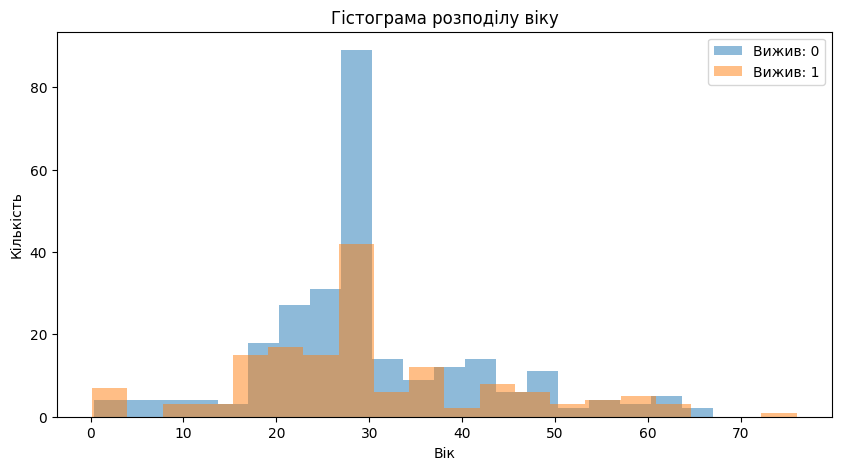


Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

Група з найвищим рівнем виживання:
(1, 1)

Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Logistic Regression - Найкращі параметри: {'C': 0.1}
Logistic Regression - Точність на тестових даних: 1.0
Logistic Regression - Звіт класифікації:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00     

In [2]:
import pandas as pd

# 1. Завантаження датасету і виведення перших 5 рядків
df = pd.read_csv('titanic.csv')
print("Перші 5 рядків датасету:")
print(df.head())

# 2. Визначення розміру датасету
print("\nРозмір датасету:")
print(df.shape)

# 3. Визначення типів даних
print("\nТипи даних:")
print(df.dtypes)

# 4. Визначення наявності пропущених значень і їх заміна на середнє
print("\nНаявність пропущених значень:")
print(df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

# 5. Ще раз перевірити наявність пропущених значень
print("\nНаявність пропущених значень після заповнення:")
print(df.isnull().sum())

# 6. Перевірка наявності дублікатів і їх видалення
print("\nКількість дублікатів:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 7. Описова статистика датасету
print("\nОписова статистика датасету:")
print(df.describe())

# 8. Видалення стовпчика Cabin
df.drop('Cabin', axis=1, inplace=True)

# 9. Сформувати датасет з обраними стовпцями
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# 10. Замінити бінарні ознаки (Стать) на 0 і 1
print("\nУнікальні значення стовпчика 'Sex':")
print(df['Sex'].unique())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 11. Ще раз перевірити кількість пропущених даних
print("\nКількість пропущених даних після заміни статі:")
print(df.isnull().sum())

# 12. Вивести 5 перших рядків датасету
print("\nПерші 5 рядків датасету після змін:")
print(df.head())

# 13. Вивести 5 останніх рядків датасету
print("\nОстанні 5 рядків датасету:")
print(df.tail())

# 14. Аналіз виживання залежно від статі
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання для кожної статі:")
print(survival_by_sex)

# 15. Відсоток виживання для кожного класу
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання для кожного класу:")
print(survival_by_class)
print("\nКлас з найвищим рівнем виживання:")
print(survival_by_class.idxmax())

# 16. Середній вік тих, хто вижив і не вижив
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print("\nСередній вік виживших:", average_age_survived)
print("Середній вік тих, хто не вижив:", average_age_not_survived)

# 17. Розподіл за тарифами
fare_bins = pd.cut(df['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Medium', 'High', 'Very High'])
survival_by_fare = df.groupby(fare_bins)['Survived'].mean() * 100
print("\nРівень виживання для кожної групи тарифів:")
print(survival_by_fare)

# 18. Середній тариф для кожного класу
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф для кожного класу:")
print(average_fare_by_class)

# 19. Середній вік пасажирів для кожного класу
average_age_by_class = df.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів для кожного класу:")
print(average_age_by_class)

# 20. Гістограма розподілу віку
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for survived in [0, 1]:
    subset = df[df['Survived'] == survived]['Age']
    plt.hist(subset, bins=20, alpha=0.5, label=f'Вижив: {survived}')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()
plt.title('Гістограма розподілу віку')
plt.show()

# 21. Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВідсоток виживання для кожної комбінації статі та класу:")
print(survival_by_sex_class)
print("\nГрупа з найвищим рівнем виживання:")
print(survival_by_sex_class.idxmax())

# 22. Кореляція між числовими змінними
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("\nКореляція між числовими змінними:")
print(correlation)

# Побудова класифікаторів і визначення найкращої моделі
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Підготовка даних
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Моделі
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Параметри для GridSearchCV
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10], 'min_samples_split': [2, 10]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 10]}
}

best_model = None
best_score = 0

for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    score = grid.best_score_
    print(f"\n{name} - Найкращі параметри: {grid.best_params_}")
    print(f"{name} - Точність на тестових даних: {score}")
    print(f"{name} - Звіт класифікації:\n", classification_report(y_test, y_pred))

    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_

print("\nНайкраща модель:", best_model)

# Прогноз для 10 випадків
sample_predictions = best_model.predict(X_test[:10])
print("\nПрогноз для 10 випадків:")
print(sample_predictions)


Висновок: Перевірка пропущених значень: Пропущені значення заповнено середніми значеннями.
Аналіз виживання: Залежність від статі, класу, віку і тарифу.
Розподіл віку: Візуалізація через гістограму.
Моделі класифікації: Вибір найкращої моделі на основі точності та метрик.